## Estadística Aplicada

# Actividad 5
Nombre: Oscar Gabriel Martínez Rodríguez

Matrícula: 1962702

Grupo: 43

In [6]:
## librerias basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
## librerias especificas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [8]:
## datos
data = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')
data.head()

,tiempo,mujer,quebrar
0,21,0,1
1,16,1,0
2,26,1,1
3,17,1,0
4,29,1,1


In [14]:
data.describe()

,tiempo,mujer,quebrar
count,100.000000,100.000000,100.000000
mean,14.770000,0.510000,0.480000
std,8.765007,0.502418,0.502117
min,1.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000
50%,13.000000,1.000000,0.000000
75%,22.000000,1.000000,1.000000
max,30.000000,1.000000,1.000000


En el enlace se encuentra la base de datos “quiebra.csv”que mide los años que tarda  en  quebrar  una  empresa  (desde  que se  crea  hasta  que quiebra),  la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada(no se observó la quiebra en el periodo de observación). La variable mujer toma valores  de  0  si  el  fundador  de  la  empresa  es  hombre  y  1  si  el  fundador  de  la empresa  es  mujer.  La  variable  tiempo  mide  los  años  que  tardo  en  quebrar  la empresa. 

In [9]:
#a) ajuste un modelo de supervivencia exponencial
expon = ExponentialFitter().fit(data['tiempo'], data['quebrar'])

Text(0, 0.5, '$h(t)$')

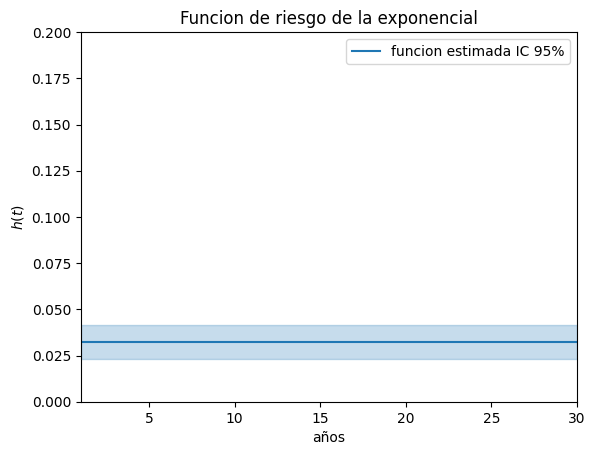

In [45]:
#grafique la funcion de riesgo
expon.plot_hazard(label = 'funcion estimada IC 95%')
plt.title('Funcion de riesgo de la exponencial')
plt.xlim(1,30)
plt.ylim(0,0.2)
plt.xlabel('años')
plt.ylabel('$h(t)$')

In [32]:
#c) ¿Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?
expon.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


Dado que el riesgo es constante para cualquier momento t, el riesgo de que una empresa quiebre según la función exponencial es de **0.032498**

4.-Con  la  base  de  datos del  punto  3 responda en  la  misma  notebook  lo siguiente:

In [19]:
#a) Ajuste un modelo Weibull de supervivencia 
weib = WeibullFitter().fit(data['tiempo'], data['quebrar'])

Text(0, 0.5, '$ h(t) $')

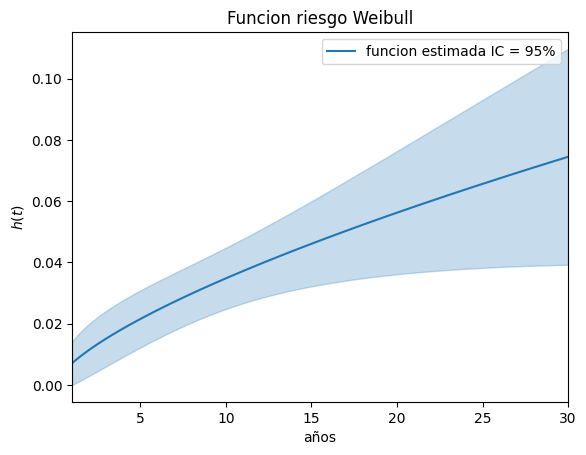

In [43]:
#b) Grafique la función de riesgo
weib.plot_hazard(label = 'funcion estimada IC = 95%')
plt.title('Funcion riesgo Weibull')
plt.xlim(1, 30)
plt.xlabel('años')
plt.ylabel('$ h(t) $')

In [37]:
#c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 
weib.hazard_

,Weibull_estimate
1.000000,0.007059
1.292929,0.008434
1.585859,0.009716
1.878788,0.010927
2.171717,0.012080
...,...
28.828283,0.072459
29.121212,0.072969
29.414141,0.073476
29.707071,0.073982


Tiene forma creciente, lo cual significa que el riesgo como tal también es creciente

5.-Con  la  base  de  datos  del  punto  3  responda  en  la  misma  notebook  lo siguiente:

In [26]:
#a) Ajuste un modelo Log-Normal
mlogn = LogNormalFitter().fit(data['tiempo'], data['quebrar'])

Text(0, 0.5, '$ h(t) $')

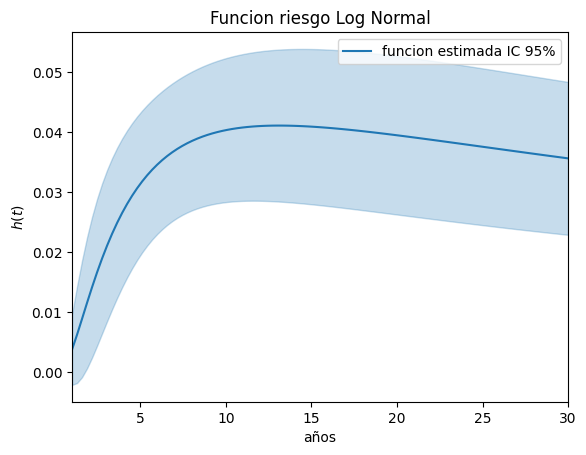

In [42]:
#b) Grafique la función de riesgo
mlogn.plot_hazard(label = 'funcion estimada IC 95%')
plt.title('Funcion riesgo Log Normal')
plt.xlim(1, 30)
plt.xlabel('años')
plt.ylabel('$ h(t) $')

In [41]:
#c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente
mlogn.hazard_

,LogNormal_estimate
1.000000,0.003749
1.292929,0.006219
1.585859,0.008870
1.878788,0.011543
2.171717,0.014143
...,...
28.828283,0.036053
29.121212,0.035941
29.414141,0.035829
29.707071,0.035718


In [75]:
mlogn1 = pd.DataFrame(mlogn.hazard_)
mlogn1[12.5:14]

,LogNormal_estimate
12.717172,0.041061
13.010101,0.041069
13.303030,0.041067
13.595960,0.041056
13.888889,0.041036


Gráficasmente, se ve que de 1 año a aprox 10 años, un poco después, es creciente, mientras que de allí en adelante es decreciente hasta finalizar en tiempo = 30 años.

Con el comando mlogn1[12.5:14] se encuentra que a partir de los 13 años comienza a tener un comportamiento decreciente.

6.-Utilizando  elestimador  de  Kaplan-Meier realice  una  notebook  en  Python para responder lo siguiente:

In [46]:
#a) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

In [47]:
km1 = KaplanMeierFitter().fit(data['tiempo'], data['quebrar'])

In [48]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,0.990000
2.0,0.959694
3.0,0.928400
4.0,0.928400
5.0,0.917477
7.0,0.873261
8.0,0.829046
9.0,0.829046


In [49]:
km1.median_survival_time_

23.0

La media de 23 semanas indica que la mitad de las empresas fundadas quiebran a las 23 semanas.

b) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False) y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

In [56]:
hombres = data.query('mujer == 0')
mujer = data.query('mujer == 1')

In [57]:
km1_h = KaplanMeierFitter().fit(hombres['tiempo'], hombres['quebrar'])
km1_m = KaplanMeierFitter().fit(mujer['tiempo'], mujer['quebrar'])

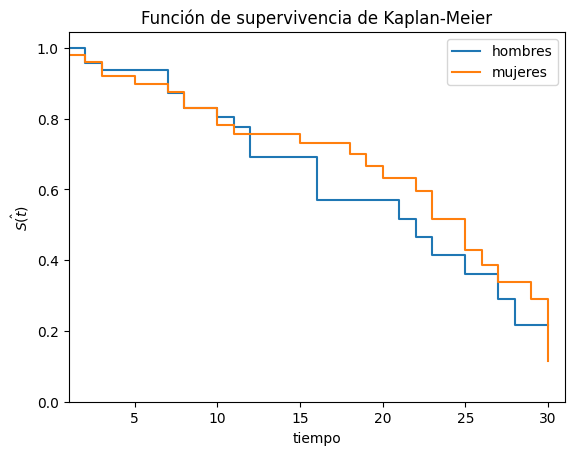

In [60]:
km1_h.plot_survival_function(label = 'hombres', ci_show=False)
km1_m.plot_survival_function(label = 'mujeres', ci_show=False)
plt.xlim(1,31)
plt.title('Función de supervivencia de Kaplan-Meier')
plt.xlabel('tiempo')
plt.ylabel('$\hat{S(t)}$')
plt.yticks([0,0.2,0.4,0.6,0.8,1]);

Las empresas tienen un comportamiento similar ya sean administradas por hombres o mujeres, aunque gráficamente se aprecia que la s(t) correspondiente a los hombres decrece más comparado al de las mujeres, por lo que se podría decir que las empresas administradas por hombres quiebran más rápido (al menos gráficamente).

c) El profesor cree que las empresas fundadas por hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

In [61]:
#a traves de una log rank test primero confirmar que sean distintos

prueba de hipótesis (Log Rank Test)
$H0 : S(1) = S(2)$ funciones de supervivencia iguales
$Ha: S(1) =/= S(2)$ funciones de supervivencia distintas

In [63]:
lrt = logrank_test(hombres['tiempo'], mujer['tiempo'],hombres['quebrar'],mujer['quebrar'])
lrt.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75>

In [64]:
lrt.p_value.round(2)

0.59

In [65]:
km1_h.median_survival_time_

22.0

In [66]:
km1_m.median_survival_time_

25.0

Dado el p-valor de 0.59, no se rechaza H0, por lo que no se consideran distintas las funciones de supervivencia entre hombres y mujeres, quiebran de forma similar.  La mitad de las empresas fundadas por hombres quiebran a las 22 semanas, mientras que la mitas de las empresas fundadas por mujeres quiebran a las 25 semanas.